In [1]:
import pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import ttest_ind    # ttest_ind tests the equality of means
from scipy.stats import chisquare    # chisquare tests the independence of 2 distributions

### analysis of the cases corpus

In [4]:
df = pickle.load(open("/home/xhta/Robot/proj/pj_df_full.20190629_095112.pkl", "rb"))

In [5]:
len(df)

5762

In [6]:
df.head()

,case_reversed,judge_id,year,log_cites,LastName,FirstName,Gender,Pres,Party,nlets,...,antpresent,antfuture,nfpast,nfpresent,nffuture,antfpast,antfpresent,antffuture,ldeont,lmodal
caseid,,,,,,,,,,,,,,,,,,,,,
X3JGGO,0,1653,1925,1.098612,Miller,Wilbur,1,Harry S Truman,Democratic,46558.0,...,0.363874,0.172775,280.0,308.0,101.0,0.406386,0.447025,0.146589,18.0,7.0
X3OH3J,0,1034,1924,1.609438,Hickenlooper,Smith,1,Warren G. Harding,Republican,16689.0,...,0.335025,0.005076,123.0,94.0,12.0,0.537118,0.410480,0.052402,0.0,8.0
X3U0KO,0,2303,1925,1.791759,Story,William,1,Ulysses Grant,Republican,5044.0,...,0.527273,0.036364,31.0,39.0,8.0,0.397436,0.500000,0.102564,0.0,3.0
X53HAD,0,1764,1924,0.000000,Nielsen,Leland,1,Richard M. Nixon,Republican,32994.0,...,0.524927,0.052786,152.0,331.0,49.0,0.285714,0.622180,0.092105,9.0,8.0
X9VC5V,0,493,1925,0.000000,Connally,Ben,1,Harry S Truman,Democratic,1276.0,...,0.181818,0.000000,15.0,7.0,0.0,0.681818,0.318182,0.000000,0.0,1.0


In [7]:
df.columns
# npast, npresent, nfuture : absolute numbers of past, present, future tenses from POS tagging
# nfpast, nfpresent, nffuture : absolute number of focus past, focus present, focus future from LIWC
# antpast, antpresent, antfuture : fractions of past, present, future 
# antfpast, antfpresent, antffutre : fractions of focus past, focus present, focus future

Index(['case_reversed', 'judge_id', 'year', 'log_cites', 'LastName',
       'FirstName', 'Gender', 'Pres', 'Party', 'nlets', 'nsents', 'nwords',
       'doc', 'ntoks', 'nverbs', 'npast', 'npresent', 'nfuture', 'antpast',
       'antpresent', 'antfuture', 'nfpast', 'nfpresent', 'nffuture',
       'antfpast', 'antfpresent', 'antffuture', 'ldeont', 'lmodal'],
      dtype='object')

### only the Republican and the democratic parties are considered, the rest (Federalist, Whig, Jeffersonian Republican, partiless) are mainly historical 

In [8]:
df_republican = df[ df["Party"] == "Republican"]
df_democratic = df[ df["Party"] == "Democratic"]

In [9]:
len(df_republican)

2597

In [10]:
len(df_democratic)

2040

### POS tagging: the fractions of past, present, future tenses, all parties

In [82]:
spas = df["npast"].sum()			# spacy 
sprs = df["npresent"].sum()
sfus = df["nfuture"].sum()

sAvepast, sAvepresent, sAvezfuture = [spas, sprs, sfus]/(spas + sprs + sfus)

### LIWC, the fractions of past forucs, present focus and future focus, all parties

In [83]:
lpas = df["nfpast"].sum()		# LIWC         
lprs = df["nfpresent"].sum()
lfus = df["nffuture"].sum()

lAvepast, lAvepresent, lAvezfuture = [lpas, lprs, lfus]/(lpas + lprs + lfus)

#### make a plot showing the proportions of past, present and future tenses averaged across the entire corpus

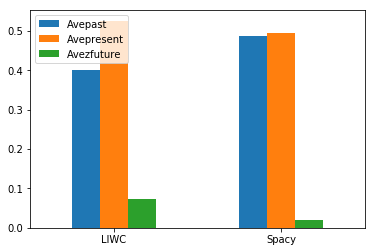

In [84]:
modfplot = pd.DataFrame({'Avepast' : [lAvepast, sAvepast], 'Avepresent': [lAvepresent, sAvepresent], 'Avezfuture': [lAvezfuture, sAvezfuture]}, index =
 ['LIWC', 'Spacy'] )
modfplot.plot.bar(rot=0)
plt.legend(loc='best')
plt.show()

### histograms, timing orientation


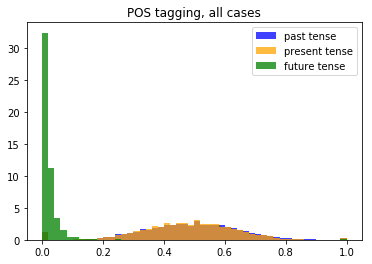

In [16]:
plt.hist(df["antpast"], 50, density=1, facecolor = 'blue', alpha = 0.75, label='past tense')
plt.hist(df["antpresent"], 50, density=1, facecolor = 'orange', alpha = 0.75, label = 'present tense')
plt.hist(df["antfuture"], 50, density=1, facecolor = 'green', alpha = 0.75, label = 'future tense')
plt.title("POS tagging, all cases")
plt.legend(loc='best')
plt.show()

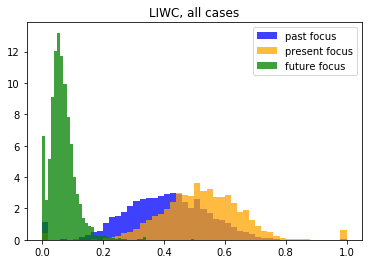

In [18]:
plt.hist(df["antfpast"], 50, density=1, facecolor = 'blue', alpha = 0.75, label='past focus')
plt.hist(df["antfpresent"], 50, density=1, facecolor = 'orange', alpha = 0.75, label='present focus')
plt.hist(df["antffuture"], 50, density=1, facecolor = 'green', alpha = 0.75, label='future focus')
plt.title("LIWC, all cases")
plt.legend(loc='best')
plt.show()

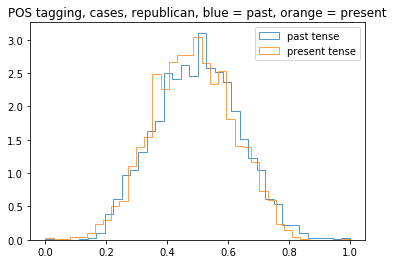

In [19]:
plt.hist(df_republican["antpast"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75, histtype = 'step', label='past tense')
plt.hist(df_republican["antpresent"], bins='auto', density=1, facecolor = 'orange', alpha = 0.75, histtype = 'step', label='present tense')
#plt.hist(df_republican["antfuture"], bins='auto', density=1, facecolor = 'green', alpha = 0.75, histtype = 'step', label='future tense')
plt.title("POS tagging, cases, republican, blue = past, orange = present")
plt.legend(loc='best')
plt.show()
# future tense left out to avoid the spike at 0

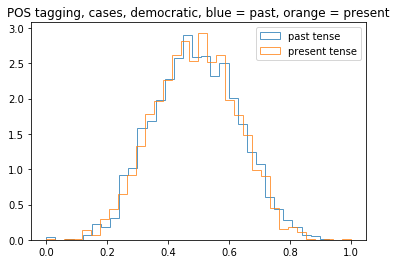

In [22]:
plt.hist(df_democratic["antpast"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75, histtype = 'step', label='past tense')
plt.hist(df_democratic["antpresent"], bins='auto', density=1, facecolor = 'orange', alpha = 0.75, histtype = 'step', label='present tense')
#plt.hist(df_democratic["antfuture"], bins='auto', density=1, facecolor = 'green', alpha = 0.75, histtype = 'step', label='future tense')
plt.title("POS tagging, cases, democratic, blue = past, orange = present")
plt.legend(loc='best')
plt.show()
# future tense left out to avoid the spike at 0


### histogram, deontic future and modal verbs


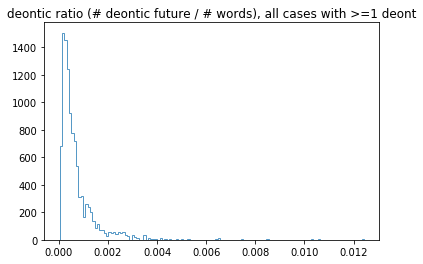

In [24]:
# considering only cases with at least 1 deontic future, to avoid the spike at 0
df['deontic_ratio'] = df['ldeont'] / df['nwords']
plt.hist(df.loc[df["deontic_ratio"] > 0, "deontic_ratio"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75, histtype = 'step')
plt.title("deontic ratio (# deontic future / # words), all cases with >=1 deont")
plt.show()

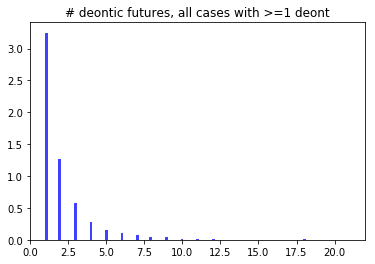

In [25]:
plt.hist(df.loc[df["ldeont"] > 0, "ldeont"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75)
plt.title("# deontic futures, all cases with >=1 deont")
plt.show()

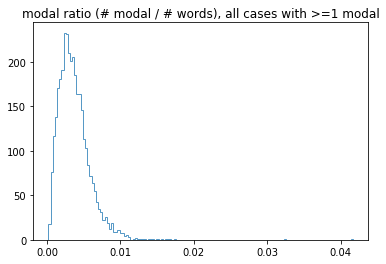

In [26]:
df['modal_ratio'] = df['lmodal'] / df['nwords']
plt.hist(df.loc[df["modal_ratio"] > 0, "modal_ratio"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75, histtype = 'step')
plt.title("modal ratio (# modal / # words), all cases with >=1 modal")
plt.show()

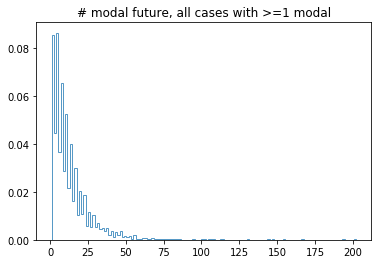

In [27]:
plt.hist(df.loc[df["lmodal"] > 0, "lmodal"], bins='auto', density=1, facecolor = 'blue', alpha = 0.75, histtype = 'step')
plt.title("# modal future, all cases with >=1 modal")
plt.show()

##### excerpt from scipy.stats.ttest_ind :

We can use this test, if we observe two independent samples from the same or different population .... 
The test measures wther the average (expected) value differs significantly across samples. 
If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of 
identical average. If the p-value is smaller than the threshold, e.g. 1% , r% or 10%, then we reject the null 
hypothesis of equal averages. The two samples does not need to have the same length.

##### excerpt from scipy.chisquare1:
Tests the null hypothesis that the categorical data has the given frequencies. (f_obs, f_exp, ddof = 0, axis = 0)
The p-value is computed using a chi-squared distribution with k - 1- ddof degrees of freedom, where k = the number of observed frequencies.

In [85]:
# calculate the proportions of past, present and future tenses averaged across the entire corpus
# see above                 POS tagging
print(sAvepast, sAvepresent, sAvezfuture)


0.48633199147164446 0.4944106035785858 0.019257404949769755


In [86]:
# chisquared test   observed data vs expected (=uniformly distributed) data   POS tagging  entire cases corpus
#chisquare([100*sAvepast, 100*sAvepresent, 100*sAvefuture], [33, 33, 34])
chisquare([49, 49, 2], [33, 33, 34])
# high test statistic and low p-value indicate that the observed distribution is unequal to the expected, uniform distribution
# hence the use of past, present and future tenses in the case corpus is deliberate

Power_divergenceResult(statistic=45.632798573975045, pvalue=1.2330017493455464e-10)

In [87]:
# calculate the proportions of past, present and future focus averaged across the entire corpus
# see above                   LIWC
print(lAvepast, lAvepresent, lAvezfuture)

0.40126752767022084 0.5258992993042367 0.07283317302554237


In [88]:
# chisquared test   observed data vs expected (=uniformly distributed) data   LIWC  entire cases corpus
chisquare([100*lAvepast, 100*lAvepresent, 100*lAvefuture], [33, 33, 34])
# high test statistic and low p-value indicate that the observed distribution is unequal to the expected, uniform distribution
# hence the use of past, present and future focus in the case corpus is deliberate

Power_divergenceResult(statistic=35.11728474285506, pvalue=2.3679826082951493e-08)

In [ ]:
# test results show that distribution of time orientation in the cases corpus is statistically significantly not uniform

In [11]:
# POS tagging  antpast, antpresent, antfuture

In [38]:
ttest_ind(df["antpast"], df["antpresent"])
# high t-statistic and low p-value indicate the mean of past tenses and present tenses are not equal

Ttest_indResult(statistic=3.9810333139896397, pvalue=6.903741440270563e-05)

In [81]:
ttest_ind(df["antpresent"], df["antfuture"])
# high t-statistic and low p-value indicate the mean of present tenses and future tenses are not equal

Ttest_indResult(statistic=210.58070597007398, pvalue=0.0)

In [14]:
# LIWC  antfpast, antfpresent, antffuture   vs  POS tagging antpast, antpresent, antfuture

In [39]:
ttest_ind(df["antfpast"], df["antpast"])
# high t-statistic and low p-value indicate the mean of past tenses (POS) and past focus (LIWC) are not equal

Ttest_indResult(statistic=-28.8494721330526, pvalue=9.031728047365847e-177)

In [40]:
ttest_ind(df["antfpresent"], df["antpresent"])  
# high t-statistic and low p-value indicate the mean of present tenses (POS) and present focus (LIWC) are not equal

Ttest_indResult(statistic=16.251280671509075, pvalue=9.823219810691702e-59)

In [42]:
ttest_ind(df["antffuture"], df["antfuture"])
# high t-statistic and low p-value indicate the mean of future tenses (POS) and future focus (LIWC) are not equal

Ttest_indResult(statistic=57.424724422704024, pvalue=0.0)

In [43]:
# POS tagging    past, present, future over the years

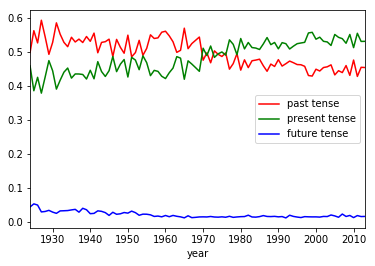

In [44]:
import matplotlib.pyplot as plt
axpast = df[df["year"] != 0 ].groupby('year')['antpast'].mean().plot(color='red', label='past tense')
axpresent = df[df["year"] != 0].groupby('year')['antpresent'].mean().plot(color='green', label='present tense')
axfuture = df[df["year"] !=0].groupby('year')['antfuture'].mean().plot(color='blue', label='future tense')
plt.legend(loc='best')
plt.show()	

In [45]:
pasttense_before1970 = df [df["year"] < 1970]["antpast"]
pasttense_after1970 = df [df["year"] >= 1970]["antpast"]

In [26]:
# indicates means before 1970 statististically significantly differs from after 1970
ttest_ind(pasttense_before1970, pasttense_after1970)

Ttest_indResult(statistic=9.648791508483363, pvalue=7.27435956407142e-22)

In [27]:
#  LIWC    past, present, future over the years

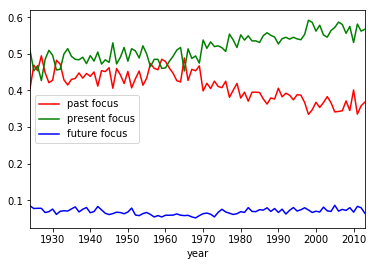

In [46]:
import matplotlib.pyplot as plt
axpast = df[df["year"] != 0 ].groupby('year')['antfpast'].mean().plot(color='red', label='past focus')
axpresent = df[df["year"] != 0].groupby('year')['antfpresent'].mean().plot(color='green', label='present focus')
axfuture = df[df["year"] !=0].groupby('year')['antffuture'].mean().plot(color='blue', label='future focus')
plt.legend(loc='best')
plt.show()	

In [47]:
pastfocus_before1970 = df [df["year"] < 1970]["antfpast"]
pastfocus_after1970 = df [df["year"] >= 1970]["antfpast"]

In [48]:
# indicates means before 1970 statististically significantly differs from after 1970
ttest_ind(pastfocus_before1970, pastfocus_after1970)

Ttest_indResult(statistic=10.291460917234133, pvalue=1.256953354749462e-24)

### republican vs democratic

In [50]:
df_republican = df[ df["Party"] == "Republican"]
df_democratic = df[ df["Party"] == "Democratic"]

In [89]:
# POS tagging    past tense, present tense, future tense    rep 
rpas = df_republican['npast'].sum()
rprs = df_republican['npresent'].sum()
rfus = df_republican ['nfuture'].sum()

rAvepast, rAvepresent, rAvefuture = [rpas, rprs, rfus]/(rpas + rprs + rfus)

In [90]:
# chisquared test      observed data vs expected (=uniformly distributed) data    rep     POS tagging
chisquare([100*rAvepast, 100*rAvepresent, 100*rAvefuture], [33, 33, 34])
# use of past, present and future tenses by republican judges not uniformly distributed

Power_divergenceResult(statistic=45.88852470731267, pvalue=1.085009319421516e-10)

In [91]:
dpas = df_democratic['npast'].sum()
dprs = df_democratic['npresent'].sum()
dfus = df_democratic['nfuture'].sum()

dAvepast, dAvepresent, dAvefuture = [dpas, dprs, dfus]/(dpas + dprs + dfus)

In [92]:
# chisquared test      observed data vs expected (=uniformly distributed) data    dem     POS tagging
chisquare([100*dAvepast, 100*dAvepresent, 100*dAvefuture], [33, 33, 34])
# use of past, present and future tenses by democratic judges not uniformly distributed

Power_divergenceResult(statistic=45.87832798138105, pvalue=1.0905552162376727e-10)

In [56]:
# POS tagging  past tense    rep vs dem
ttest_ind(df_republican["antpast"], df_democratic["antpast"])
# test result indicating use of past tense not significantly different between republican and democratic judges

Ttest_indResult(statistic=1.4863221647624705, pvalue=0.13726194142666256)

In [35]:
# POS tagging  present tense  rep vs dem
ttest_ind(df_republican["antpresent"], df_democratic["antpresent"])
# test result indicating use of present tense not significantly different between republican and democratic judges

Ttest_indResult(statistic=-1.5542463287572683, pvalue=0.12019394412787038)

In [57]:
# POS tagging  future tense  rep vs dem
ttest_ind(df_republican["antfuture"], df_democratic["antfuture"])
# test result indicating use of future tense not significantly different between republican and democratic judges

Ttest_indResult(statistic=0.8914861232937964, pvalue=0.3727147081497669)

In [38]:
# LIWC  past focus   rep vs dem
ttest_ind(df_republican["antfpast"], df_democratic["antfpast"])
# test result indicating use of past focus not significantly different between republican and democratic judges

Ttest_indResult(statistic=1.1871225805247378, pvalue=0.23524010971524925)

In [58]:
# LIWC  present focus  rep vs dem
ttest_ind(df_republican["antfpresent"], df_democratic["antfpresent"])
# test result indicating use of present focus not significantly different between republican and democratic judges

Ttest_indResult(statistic=-1.8136488402454323, pvalue=0.06979644819482464)

In [59]:
# LIWC  future focus  rep vs dem
ttest_ind(df_republican["antffuture"], df_democratic["antffuture"])
# test result indicating use of future focus not significantly different between republican and democratic judges

Ttest_indResult(statistic=1.5543266654359942, pvalue=0.12017478973887423)

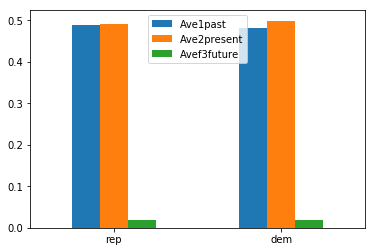

In [93]:
# POS tagging    past tense, present tense, future tense    rep vs dem
modfplot = pd.DataFrame({'Ave1past' : [rAvepast, dAvepast], 'Ave2present': [rAvepresent, dAvepresent], 'Avef3future': [rAvefuture, dAvefuture]}, index = ['rep', 'dem'] )
modfplot.plot.bar(rot=0)
plt.show()

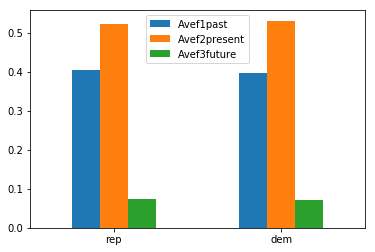

In [94]:
# LIWC   past focus, present focus, future focus    rep vs dem
rfpas = df_republican['nfpast'].sum()
rfprs = df_republican['nfpresent'].sum()
rffus = df_republican ['nffuture'].sum()

rAvefpast, rAvefpresent, rAveffuture = [rfpas, rfprs, rffus]/(rfpas + rfprs + rffus)

dfpas = df_democratic['nfpast'].sum()
dfprs = df_democratic['nfpresent'].sum()
dffus = df_democratic['nffuture'].sum()

dAvefpast, dAvefpresent, dAveffuture = [dfpas, dfprs, dffus]/(dfpas + dfprs + dffus)

modfplot = pd.DataFrame({'Avef1past' : [rAvefpast, dAvefpast], 'Avef2present': [rAvefpresent, dAvefpresent], 'Avef3future': [rAveffuture, dAveffuture]}, index = ['rep', 'dem'] )
modfplot.plot.bar(rot=0)
plt.show()

In [95]:
# chisquared test      observed data vs expected (=uniformly distributed) data    rep     LIWC
chisquare([100*rAvefpast, 100*rAvefpresent, 100*rAveffuture], [33, 33, 34])
# use of past, present and future focus by republican judges not uniformly distributed

Power_divergenceResult(statistic=33.85030521178655, pvalue=4.461692320230134e-08)

In [96]:
# chisquared test      observed data vs expected (=uniformly distributed) data    dem     LIWC
chisquare([100*dAvefpast, 100*dAvefpresent, 100*dAveffuture], [33, 33, 34])
# use of past, present and future focus by democratic judges not uniformly distributed

Power_divergenceResult(statistic=34.60614352071076, pvalue=3.05753484046541e-08)